In [4]:

#import matplotlib.pyplot as plt
import os
import torch
from src.rgcn_explainer_utils import *
import pandas as pd
import numpy as np
import src.kgbench as kg

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Check if the current directory is already the parent directory
if current_dir != '/Users/macoftraopia/Documents/GitHub/RGCN-Explainer':
    # Set the parent directory as the current directory
    os.chdir(parent_dir)
!pwd

/Users/macoftraopia/Documents/GitHub/RGCN-Explainer


In [13]:
filename = 'data/IMDB/imdb_onegenre.nt'
output_filename = 'data/IMDB/imdb_onegenre_.nt'
literal_rel = pd.read_csv('IMDB_relation_literal.csv')
literal_rel = literal_rel['relation'].tolist()

with open(filename, 'r') as file, open(output_filename, 'w') as output:
    for line in file:
        for i in literal_rel:
         if i not in line:
            output.write(line)
literal_rel = pd.read_csv('IMDB_relation_literal.csv')
literal_rel = literal_rel['relation'].tolist()
print(literal_rel)

loaded data aifb (0.2231s).
12
9
9
9
9
9
9
12
Counter({'publication': 8, 'author': 7})


Counter({'publication': 8, 'author': 7})

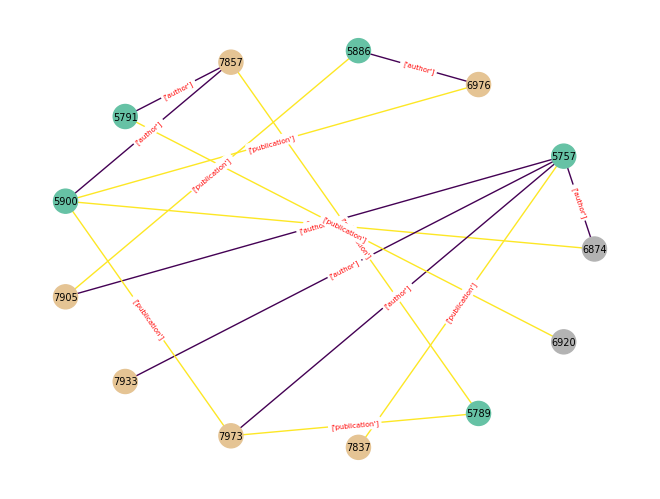

In [17]:
#path = 'chk/aifb_chk/exp/init_normal_hops_2_lr_0.1_adaptive_False_size_5e-05_sizestd_adaptive_ent_10_type_1_killtype_True_break_no/masked_adj'
#path = 'chk/aifb_chk/exp/init_normal_hops_2_lr_0.1_adaptive_False_size_5e-05_sizestd_adaptive_ent_10_type_-1_killtype_False_break_no/masked_adj'
#path = 'chk/aifb_chk/exp/init_overall_frequency_hops_2_lr_0.5_adaptive_False_size_0.005_sizestd_adaptive_ent_10_type_1_killtype_True_break_no/masked_adj'
path = 'chk/aifb_chk/exp/init_normal_hops_2_lr_0.5_adaptive_False_size_0.005_sizestd_adaptive_ent_10_type_1_killtype_True_break_no/masked_adj'
node_idx = 5757
n_hop = 2
threshold = 0.5
name = 'aifb'
data = kg.load(name, torch=True)
d_classes(data)


v = torch.load(f'{path}/masked_ver{node_idx}')
h = torch.load(f'{path}/masked_hor{node_idx}')
h_t, v_t,t,t = threshold_mask(h,v,data,15)
visualize(node_idx, n_hop, data, v_t,threshold,name, result_weights=False, low_threshold=False,experiment_name=None, selected_visualization=True,connected_subgraph=False)

set()
{'Personen', 'ze', 'projects', 'cms', 'prost', 'users', 'kangal', 'Forschungsgruppen', 'who', 'Publications', 'ia', 'wim', 'Projekte', 'AtanasKiryakov', 'semanticportal', 'docs', 'projekte', 'EffAlg', 'fmricci', 'eOrganisation', 'mitarbeiter', 'WBS', 'sites', 'CoM', 'Users', 'bpem', 'fbe', 'wiki', 'optrek', 'valencia', 'home', 'uli', 'Publikationen', 'personen', 'Ontoagents', 'AllgMA', 'BIK', 'Kooperationen', 'about', 'blaschke', 'padlr', 'people', 'seanb', 'ath', 'Forschungsgebiete', 'auslese', 'english'}
Counter({'publication': 8, 'author': 6})


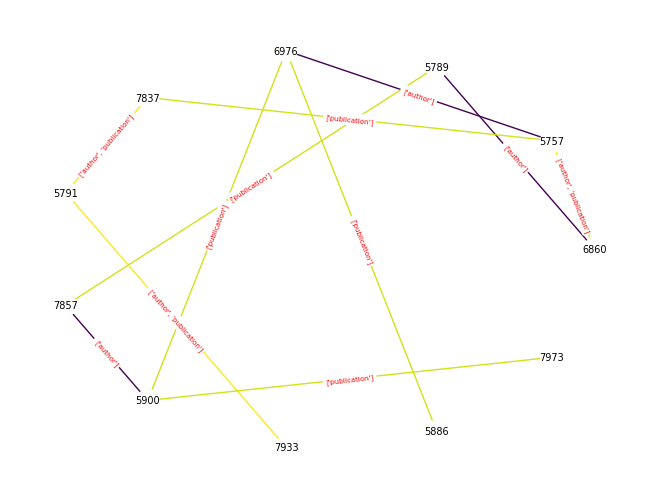

In [200]:
v = torch.load(f'{path}/masked_ver_thresh{node_idx}')
h = torch.load(f'{path}/masked_hor_thresh{node_idx}')

edges, weights = visualize(node_idx, n_hop, data, v,threshold,name, result_weights=False, low_threshold=False,experiment_name=None, selected_visualization=True,connected_subgraph=True)

In [204]:
for i,j in zip(edges, weights):

    print(data.i2e[i[0]][0],',', data.i2r[j[0]],',', data.i2e[i[1]][0])
    if len(j) > 1:
        print(data.i2e[i[0]][0],',', data.i2r[j[1]],',', data.i2e[i[1]][0])

http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id1048instance , http://swrc.ontoware.org/ontology#author , http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance
http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id1048instance , http://swrc.ontoware.org/ontology#publication , http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance
http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id1048instance , http://swrc.ontoware.org/ontology#author , http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2097instance
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance , http://swrc.ontoware.org/ontology#author , http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id1164instance
http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance , http://swrc.ontoware.org/ontology#publication , http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id795instance
http:/

In [149]:
v = torch.load(f'{path}/masked_ver_thresh{node_idx}')
h.coalesce().values().count_nonzero()

tensor(0)

In [124]:
v_t.coalesce().values().count_nonzero()

tensor(0)

loaded data mutag (0.375s).
set()
set()


/usr/local/Caskroom/miniconda/base/envs/RGCNExplainer/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(((203, 7151),
  (203, 7496),
  (203, 8245),
  (203, 18444),
  (203, 2121),
  (203, 10510),
  (203, 10354),
  (203, 14677)),
 [[14], [14], [14], [14], [20], [20], [22], [22]])

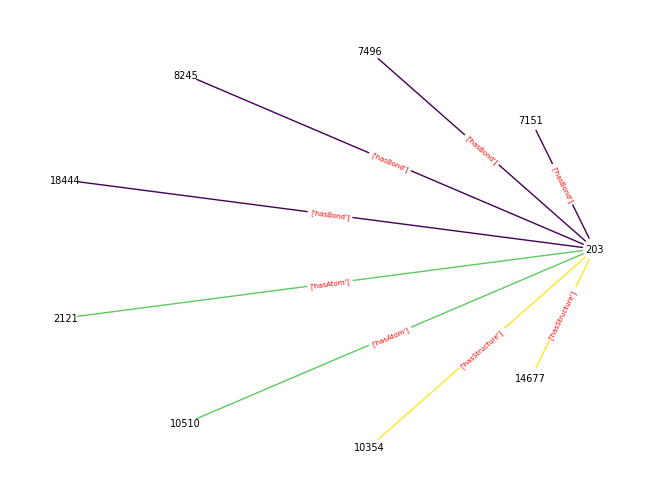

In [54]:
#path = 'chk/aifb_chk/exp/init_normal_hops_2_lr_0.1_adaptive_False_size_5e-05_sizestd_adaptive_ent_10_type_1_killtype_True_break_no/masked_adj'
#path = 'chk/aifb_chk/exp/init_normal_hops_2_lr_0.1_adaptive_False_size_5e-05_sizestd_adaptive_ent_10_type_-1_killtype_False_break_no/masked_adj'
#path = 'chk/aifb_chk/exp/init_overall_frequency_hops_2_lr_0.5_adaptive_False_size_0.005_sizestd_adaptive_ent_10_type_1_killtype_True_break_no/masked_adj'
path = 'chk/mutag_chk/exp/init_normal_hops_2_lr_0.5_adaptive_False_size_0.0005_sizestd_adaptive_ent_10_type_1_killtype_True_break_no/masked_adj'

node_idx = 203
n_hop = 2
threshold = 0.5
name = 'mutag'
data = kg.load(name, torch=True)
d_classes(data)


v = torch.load(f'{path}/masked_ver{node_idx}')
h = torch.load(f'{path}/masked_hor{node_idx}')
h_t, v_t,t_h, t_v = threshold_mask(h,v,data,15)
visualize(node_idx, n_hop, data, v_t,threshold,name, result_weights=False, low_threshold=False,experiment_name=None, selected_visualization=True,connected_subgraph=True)

set()
set()


/usr/local/Caskroom/miniconda/base/envs/RGCNExplainer/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(((169, 13116),
  (169, 13458),
  (13116, 170),
  (13116, 179),
  (13116, 188),
  (13116, 203),
  (13116, 442),
  (13116, 708),
  (13116, 718),
  (13116, 793),
  (13116, 1019),
  (13116, 1148),
  (13116, 1612),
  (13116, 1790),
  (13116, 1868),
  (13116, 1883),
  (13116, 1950),
  (13116, 2050),
  (13116, 2066),
  (13116, 2281),
  (13116, 2651),
  (13116, 3060),
  (13116, 3190),
  (13116, 3205),
  (13116, 3289),
  (13116, 3507),
  (13116, 4058),
  (13116, 4133),
  (13116, 4246),
  (13116, 4250),
  (13116, 4263),
  (13116, 4282),
  (13116, 4334),
  (13116, 4510),
  (13116, 4737),
  (13116, 4800),
  (13116, 4850),
  (13116, 5054),
  (13116, 5111),
  (13116, 5198),
  (13116, 5251),
  (13116, 5494),
  (13116, 5545),
  (13116, 5647),
  (13116, 5758),
  (13116, 5854),
  (13116, 5916),
  (13116, 6002),
  (13116, 6072),
  (13116, 6146),
  (13116, 6240),
  (13116, 6287),
  (13116, 6502),
  (13116, 6594),
  (13116, 6866),
  (13116, 6875),
  (13116, 6953),
  (13116, 6968),
  (13116, 6975),
  (1311

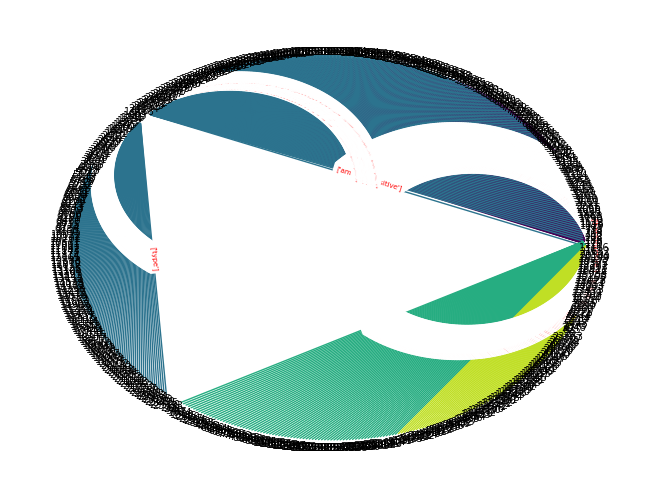

In [55]:
visualize(node_idx, n_hop, data, v_t,threshold,name, result_weights=False, low_threshold=False,experiment_name=None, selected_visualization=False,connected_subgraph=True)

set()
set()


/usr/local/Caskroom/miniconda/base/envs/RGCNExplainer/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(((11790, 13116),
  (13116, 14186),
  (13116, 16810),
  (13116, 18934),
  (13116, 19578),
  (13116, 21114),
  (13116, 22607),
  (179, 15970),
  (179, 21041),
  (179, 10038),
  (179, 11545),
  (179, 16170),
  (179, 41),
  (179, 3519),
  (179, 8488)),
 [[1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [14],
  [14],
  [20],
  [20],
  [20],
  [22],
  [22],
  [22]])

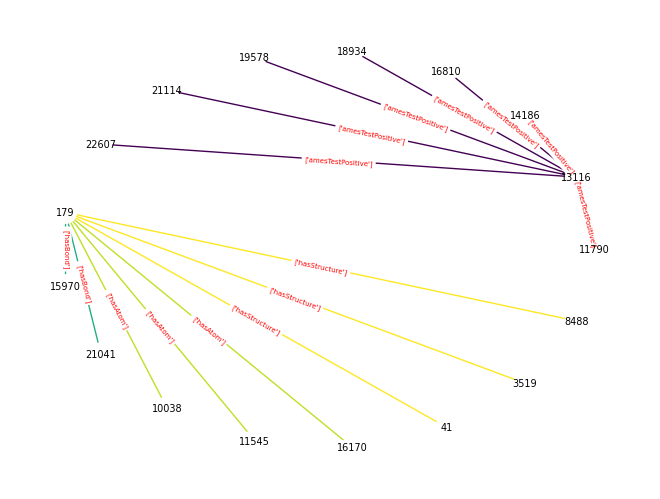

In [41]:



def visualize(node_idx, n_hop, data, masked_ver,threshold,name, result_weights=True, low_threshold=False,experiment_name=None, selected_visualization=True, connected_subgraph = True):
    """ 
    Visualize important nodes for node idx prediction
    """
    get_relations(data)
    dict_index = dict_index_classes(data,masked_ver)
    
    #select only nodes with a certain threshold
    if selected_visualization:
        sel_masked_ver = sub_sparse_tensor(masked_ver, threshold,data, low_threshold)
        sel_masked_hor = sub_sparse_tensor(masked_ver, threshold,data, low_threshold)
    else:
        sel_masked_ver = masked_ver
        sel_masked_hor = masked_ver
    if len(sel_masked_ver)==0:
        sel_masked_ver=sub_sparse_tensor(masked_ver, 0,data, low_threshold)
    indices_nodes = sel_masked_ver.coalesce().indices().detach().numpy()
    new_index = np.transpose(np.stack((indices_nodes[0], indices_nodes[1]))) #original edge indexes

    
    
    G = nx.Graph()
    if result_weights:
        values = sel_masked_ver.coalesce().values().tolist()
        for s,p,o in zip(indices_nodes[0],values , indices_nodes[1]):
            G.add_edge(int(s), int(o), weight=np.round(p, 2))

    else:

        triples_matched = match_to_triples(sel_masked_ver,sel_masked_hor, data)
        l = []
        for i in triples_matched[:,1]:
            l.append(data.i2rel[int(i)][0])
        triples_matched = find_repeating_sublists(triples_matched.tolist())
        for s,p,o in triples_matched:
            G.add_edge(int(s), int(o), weight=p)
    if connected_subgraph:
        #conncected subgraph
        #add condition to take node of interest for the connected boy
        
        # connected_components = nx.connected_components(G)
        # component = next(connected_components)
        # G = G.subgraph(component)

        connected_components = nx.connected_components(G)

        component = None
        for comp in connected_components:
            if node_idx in comp:
                component = comp
                break

        if component is not None:
            # Extract the subgraph containing the specified node
            G = G.subgraph(component)

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    weights = [[item] if not isinstance(item, list) else item for item in weights]
    weights = [list(set(w)) for w in weights]

    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G)

    ordered_dict = {}
    for item in list(G.nodes):

        if item in ordered_dict:
            ordered_dict[item].append(dict_index[item])

        # if item not in ordered_dict and item in dict_index:
        #     ordered_dict[item] =  dict_index[item]
        # if item not in dict_index:
        #     ordered_dict[item] = 100000


    dict_index = ordered_dict

    labeldict = {}
    for node in G.nodes:
        labeldict[int(node)] = int(node)  

    dict = {}
    print(set(list(dict_index.values())))
    print(set(list(data.entities_classes.keys())))
    for k,v in dict_index.items():
        for k1,v1 in data.entities_classes.items():
            if v==k1: 

                dict[k] = v1
                print(v1)
            else:
                if k not in dict:
                    dict[k] = 0
                

    color_list = list(dict.values())
    #color_list = list(encode_dict(dict_index).values())
    col_weights = [weights[i][0] for i in range(len(weights))]
    if result_weights:
        
        nx.draw(G, pos,labels = labeldict,  edgelist=edges, edge_color=col_weights, node_color =  color_list, cmap="Set2",edge_cmap=plt.cm.Reds,font_size=8)
        nx.draw_networkx_edge_labels( G, pos,edge_labels=nx.get_edge_attributes(G,'weight'),font_size=8,font_color='red')
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
        sm.set_array(weights)
        cbar = plt.colorbar(sm)
        cbar.ax.set_title('Weight')
        plt.title("Node {}'s {}-hop neighborhood important nodes".format(node_idx, n_hop))
    else:
        re = nx.get_edge_attributes(G, 'weight')
        rel =  {k: list(set(v)) for k, v in re.items()}

        for k, v in rel.items():
            if isinstance(v, list):
                updated_values = [data.i2rel[item][0] for item in v]
                rel[k] = updated_values
            else:
                rel[k] = data.i2rel[v][0]

        col_weights = [sum(weights[i]) if len(weights[i]) > 1 else weights[i][0] for i in range(len(weights))]
        nx.draw(G, pos,labels = labeldict, edge_color=col_weights,edgelist=edges,node_color =  color_list, cmap="Set2",font_size=7, arrows = True)
        nx.draw_networkx_edge_labels( G, pos,edge_labels=rel,font_size=5,font_color='red')
        
        res = Counter(unnest_list(rel.values()))
    if result_weights:
        if not os.path.exists(f'chk/{name}_chk/{experiment_name}⁄graphs'):
            os.makedirs(f'chk/{name}_chk/{experiment_name}⁄graphs')  
        plt.savefig(f'chk/{name}_chk/{experiment_name}⁄graphs/Explanation_{node_idx}_weights.png')

        #plt.show()

    else:
        if not os.path.exists(f'chk/{name}_chk/{experiment_name}⁄graphs'):
            os.makedirs(f'chk/{name}_chk/{experiment_name}⁄graphs')  
        plt.savefig(f'chk/{name}_chk/{experiment_name}⁄graphs/Explanation_{node_idx}_relations.png')    
        #plt.show()
        return  edges, weights

visualize(node_idx, n_hop, data, v_t,threshold,name, result_weights=False, low_threshold=False,experiment_name=None, selected_visualization=True,connected_subgraph=False)



Counter({'author': 2, 'isWorkedOnBy': 2, 'member': 1, 'publication': 1})


/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Counter({'author': 2, 'isWorkedOnBy': 2, 'member': 1, 'publication': 1})

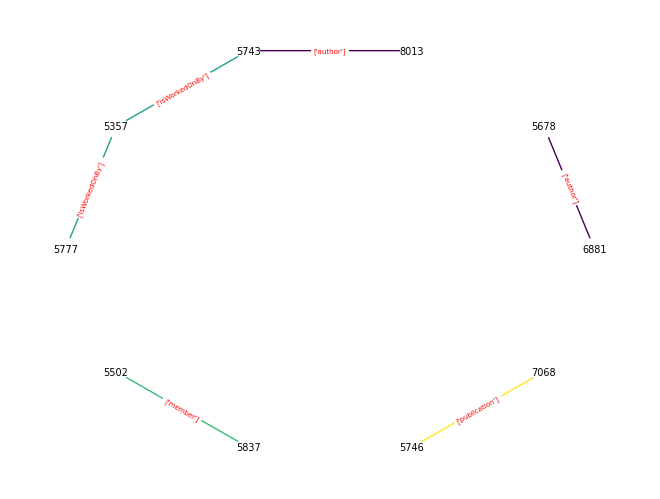

In [42]:
visualize(node_idx, n_hop, data, v,threshold,name, result_weights=False, low_threshold=False,experiment_name=None, selected_visualization=True, connected_subgraph=False)